In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats import skew
from scipy.stats.stats import pearsonr

In [16]:
data = pd.read_csv("eleicoes_2006_a_2010.csv")

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7330 entries, 0 to 7329
Data columns (total 23 columns):
ano                                      7330 non-null int64
sequencial_candidato                     7330 non-null int64
nome                                     7330 non-null object
uf                                       7330 non-null object
partido                                  7330 non-null object
quantidade_doacoes                       7330 non-null int64
quantidade_doadores                      7330 non-null int64
total_receita                            7169 non-null float64
media_receita                            7169 non-null float64
recursos_de_outros_candidatos/comites    4940 non-null float64
recursos_de_pessoas_fisicas              4647 non-null float64
recursos_de_pessoas_juridicas            3354 non-null float64
recursos_proprios                        4942 non-null float64
quantidade_despesas                      7330 non-null int64
quantidade_fornecedores 

categorical

In [5]:
#separar por ano
#data.drop(['ano','sequencial_candidato'],axis=1)

,nome,uf,partido,quantidade_doacoes,quantidade_doadores,total_receita,media_receita,recursos_de_outros_candidatos/comites,recursos_de_pessoas_fisicas,recursos_de_pessoas_juridicas,...,quantidade_despesas,quantidade_fornecedores,total_despesa,media_despesa,cargo,sexo,grau,estado_civil,ocupacao,votos
0,JOSÉ LUIZ NOGUEIRA DE SOUSA,AP,PT,6,6,16600.00,2766.666667,NaN,9000.00,6300.00,...,14,14,16583.60,1184.542857,DEPUTADO FEDERAL,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),VEREADOR,8579
1,LOIVA DE OLIVEIRA,RO,PT,13,13,22826.00,1755.846154,6625.00,15000.00,1000.00,...,24,23,20325.99,883.738696,DEPUTADO FEDERAL,FEMININO,SUPERIOR COMPLETO,SOLTEIRO(A),SERVIDOR PÚBLICO ESTADUAL,2757
2,MARIA DALVA DE SOUZA FIGUEIREDO,AP,PT,17,16,148120.80,9257.550000,2250.00,34150.00,62220.80,...,123,108,146011.70,1351.960185,DEPUTADO FEDERAL,FEMININO,SUPERIOR COMPLETO,VIÚVO(A),PEDAGOGO,17428
3,ROMALDO MILANI,MS,PRONA,6,6,3001.12,500.186667,NaN,1150.00,1101.12,...,8,8,3001.12,375.140000,DEPUTADO FEDERAL,MASCULINO,ENSINO MÉDIO INCOMPLETO,CASADO(A),MILITAR REFORMADO,1193
4,ANSELMO DE JESUS ABREU,RO,PT,48,48,NaN,NaN,NaN,50878.00,NaN,...,133,120,116416.64,970.138667,DEPUTADO FEDERAL,MASCULINO,ENSINO FUNDAMENTAL COMPLETO,CASADO(A),DEPUTADO,29401
5,JOSÉ RODRIGUES DOS SANTOS NETO,PI,PCO,6,6,1771.21,295.201667,NaN,NaN,NaN,...,9,9,1771.21,196.801111,DEPUTADO FEDERAL,MASCULINO,SUPERIOR COMPLETO,CASADO(A),SERVIDOR PÚBLICO FEDERAL,1822
6,JOSÉ TOMAZ DA SILVA,MS,PRONA,14,7,697.00,99.571429,NaN,1231.00,NaN,...,17,10,696.91,69.691000,DEPUTADO FEDERAL,MASCULINO,SUPERIOR COMPLETO,CASADO(A),MÉDICO,317
7,LUIZ CARLOS MUNHOZ MEIRA,MG,PPS,2,2,70000.00,35000.000000,NaN,NaN,NaN,...,332,278,66016.95,237.471043,DEPUTADO FEDERAL,MASCULINO,SUPERIOR COMPLETO,CASADO(A),SERVIDOR PÚBLICO FEDERAL,2591
8,EDILSON VEIRA ROCHA,AP,PT,2,2,6065.00,3032.500000,6065.00,NaN,NaN,...,10,10,6060.42,606.042000,DEPUTADO FEDERAL,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),"FEIRANTE, AMBULANTE E MASCATE",2551
9,EDUARDO VALVERDE ARAÚJO ALVES,RO,PT,68,65,105813.20,1627.895385,9575.00,59143.20,26000.00,...,68,67,110818.20,1654.002985,DEPUTADO FEDERAL,MASCULINO,SUPERIOR COMPLETO,CASADO(A),DEPUTADO,34631


In [19]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ano,7330.0,2.008151e+03,1.994416e+00,2006.00,2006.000000,2.010000e+03,2.010000e+03,2.010000e+03
sequencial_candidato,7330.0,9.179127e+10,9.924629e+10,10001.00,10565.000000,5.000000e+10,1.900000e+11,2.700000e+11
quantidade_doacoes,7330.0,2.831010e+01,1.186551e+02,1.00,4.000000,9.000000e+00,2.400000e+01,6.997000e+03
quantidade_doadores,7330.0,2.581746e+01,1.036594e+02,1.00,4.000000,8.000000e+00,2.200000e+01,5.800000e+03
total_receita,7169.0,1.544899e+05,3.953880e+05,0.00,2700.000000,1.209578e+04,8.929956e+04,4.539727e+06
media_receita,7169.0,5.485598e+03,1.411653e+04,0.00,622.857143,1.540543e+03,4.662500e+03,5.001800e+05
recursos_de_outros_candidatos/comites,4940.0,3.002116e+04,1.280932e+05,2.41,1180.000000,3.522570e+03,1.327550e+04,3.664205e+06
recursos_de_pessoas_fisicas,4647.0,3.730931e+04,8.215398e+04,0.03,2000.000000,9.000000e+03,3.756234e+04,1.403049e+06
recursos_de_pessoas_juridicas,3354.0,1.761195e+05,3.517541e+05,0.00,3422.500000,2.612000e+04,1.755218e+05,3.178226e+06
recursos_proprios,4942.0,3.914169e+04,1.839980e+05,0.00,1177.232500,5.000000e+03,2.027459e+04,5.525600e+06


recursos_de_outros_candidatos/comites    4940 non-null float64
recursos_de_pessoas_fisicas              4647 non-null float64
recursos_de_pessoas_juridicas            3354 non-null float64
recursos_proprios                        4942 non-null float64

In [ ]:
recursos_de_outros_candidatos/comites    4940 non-null float64
recursos_de_pessoas_fisicas              4647 non-null float64
recursos_de_pessoas_juridicas            3354 non-null float64
recursos_proprios                        4942 non-null float64

In [42]:
#data['recursos_de_pessoas_juridicas'].value_counts(dropna=False)
#data['recursos_de_pessoas_juridicas'].unique()

In [43]:
data.drop(['recursos_de_outros_candidatos/comites',
           'recursos_de_pessoas_fisicas','recursos_de_pessoas_juridicas',
           'recursos_proprios'],axis=1)
data.drop(['uf'],axis=1)

,ano,sequencial_candidato,nome,partido,quantidade_doacoes,quantidade_doadores,total_receita,media_receita,recursos_de_outros_candidatos/comites,recursos_de_pessoas_fisicas,...,quantidade_despesas,quantidade_fornecedores,total_despesa,media_despesa,cargo,sexo,grau,estado_civil,ocupacao,votos
0,2006,10001,JOSÉ LUIZ NOGUEIRA DE SOUSA,PT,6,6,16600.00,2766.666667,NaN,9000.00,...,14,14,16583.60,1184.542857,DEPUTADO FEDERAL,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),VEREADOR,8579
1,2006,10002,LOIVA DE OLIVEIRA,PT,13,13,22826.00,1755.846154,6625.00,15000.00,...,24,23,20325.99,883.738696,DEPUTADO FEDERAL,FEMININO,SUPERIOR COMPLETO,SOLTEIRO(A),SERVIDOR PÚBLICO ESTADUAL,2757
2,2006,10002,MARIA DALVA DE SOUZA FIGUEIREDO,PT,17,16,148120.80,9257.550000,2250.00,34150.00,...,123,108,146011.70,1351.960185,DEPUTADO FEDERAL,FEMININO,SUPERIOR COMPLETO,VIÚVO(A),PEDAGOGO,17428
3,2006,10002,ROMALDO MILANI,PRONA,6,6,3001.12,500.186667,NaN,1150.00,...,8,8,3001.12,375.140000,DEPUTADO FEDERAL,MASCULINO,ENSINO MÉDIO INCOMPLETO,CASADO(A),MILITAR REFORMADO,1193
4,2006,10003,ANSELMO DE JESUS ABREU,PT,48,48,NaN,NaN,NaN,50878.00,...,133,120,116416.64,970.138667,DEPUTADO FEDERAL,MASCULINO,ENSINO FUNDAMENTAL COMPLETO,CASADO(A),DEPUTADO,29401
5,2006,10003,JOSÉ RODRIGUES DOS SANTOS NETO,PCO,6,6,1771.21,295.201667,NaN,NaN,...,9,9,1771.21,196.801111,DEPUTADO FEDERAL,MASCULINO,SUPERIOR COMPLETO,CASADO(A),SERVIDOR PÚBLICO FEDERAL,1822
6,2006,10003,JOSÉ TOMAZ DA SILVA,PRONA,14,7,697.00,99.571429,NaN,1231.00,...,17,10,696.91,69.691000,DEPUTADO FEDERAL,MASCULINO,SUPERIOR COMPLETO,CASADO(A),MÉDICO,317
7,2006,10003,LUIZ CARLOS MUNHOZ MEIRA,PPS,2,2,70000.00,35000.000000,NaN,NaN,...,332,278,66016.95,237.471043,DEPUTADO FEDERAL,MASCULINO,SUPERIOR COMPLETO,CASADO(A),SERVIDOR PÚBLICO FEDERAL,2591
8,2006,10004,EDILSON VEIRA ROCHA,PT,2,2,6065.00,3032.500000,6065.00,NaN,...,10,10,6060.42,606.042000,DEPUTADO FEDERAL,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),"FEIRANTE, AMBULANTE E MASCATE",2551
9,2006,10004,EDUARDO VALVERDE ARAÚJO ALVES,PT,68,65,105813.20,1627.895385,9575.00,59143.20,...,68,67,110818.20,1654.002985,DEPUTADO FEDERAL,MASCULINO,SUPERIOR COMPLETO,CASADO(A),DEPUTADO,34631


In [ ]:
y = data.pop('votos')
X_train, X_validation, y_train, y_validation = train_test_split(data, y, test_size=0.2)

In [44]:
print(len(data))
df = data.dropna()
print(len(df))

7330
1549


F:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


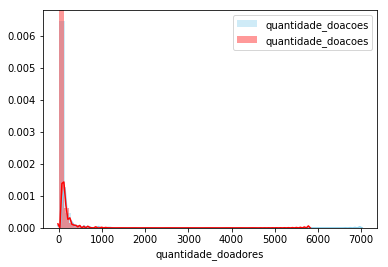

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot( df["quantidade_doacoes"] , color="skyblue", label="quantidade_doacoes")
sns.distplot( df["quantidade_doadores"] , color="red", label="quantidade_doacoes")
plt.legend()
plt.show()

F:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


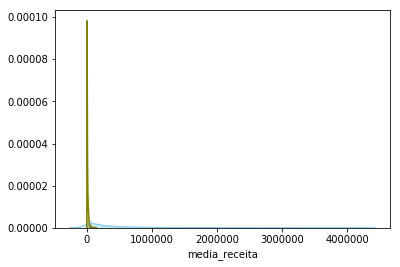

In [38]:
sns.distplot( df["total_receita"] , color="skyblue")
sns.distplot( df["media_receita"] , color="olive")
plt.show()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1549 entries, 1 to 7326
Data columns (total 23 columns):
ano                                      1549 non-null int64
sequencial_candidato                     1549 non-null int64
nome                                     1549 non-null object
uf                                       1549 non-null object
partido                                  1549 non-null object
quantidade_doacoes                       1549 non-null int64
quantidade_doadores                      1549 non-null int64
total_receita                            1549 non-null float64
media_receita                            1549 non-null float64
recursos_de_outros_candidatos/comites    1549 non-null float64
recursos_de_pessoas_fisicas              1549 non-null float64
recursos_de_pessoas_juridicas            1549 non-null float64
recursos_proprios                        1549 non-null float64
quantidade_despesas                      1549 non-null int64
quantidade_fornecedores 

F:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


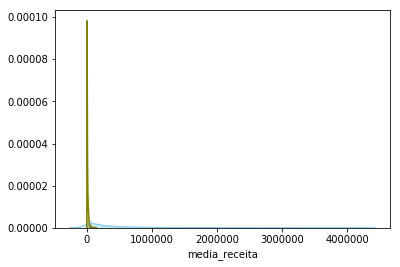

In [37]:
df.info()

#sns.distplot( df["petal_length"] , color="gold", ax=axes[1, 0])
#sns.distplot( df["petal_width"] , color="teal", ax=axes[1, 1])

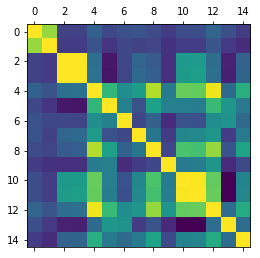

In [39]:
plt.matshow(df.corr())


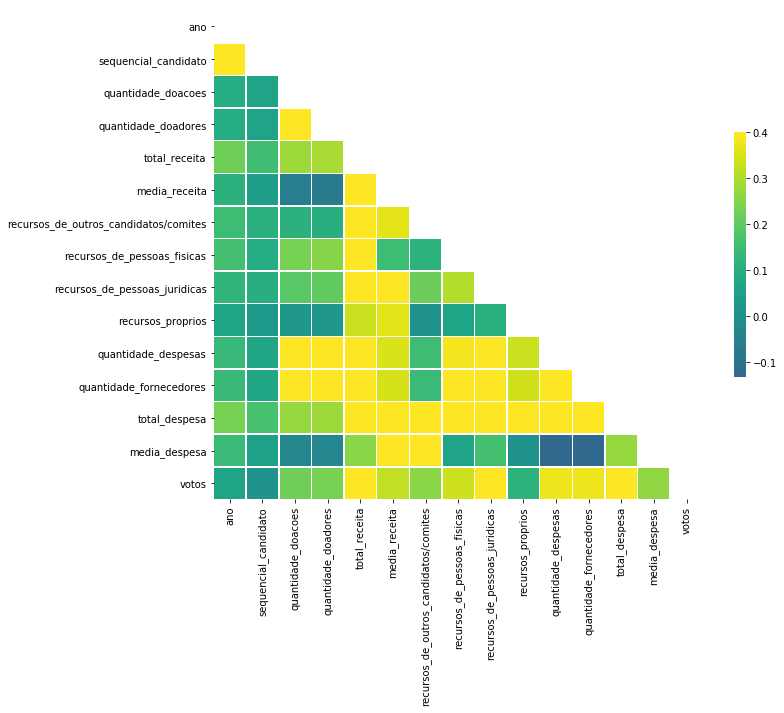

In [60]:
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
cmap='viridis'

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.4, center=0,
            square=True, linewidths=.5,
            #annot=True, 
            #fmt="g",
            cbar_kws={"shrink": .5}
           )